# Gravitational Lensing Effect

## Schwarzschild solution
$$g_{\mu\nu}(r)=\begin{bmatrix}  -B(r) &0 &0 &0 \\ 0&A(r)&0&0 \\ 0&0&r^2&0 \\ 0&0&0&r^2sin^2(\theta) \end{bmatrix}$$
$$B(r)=1-\frac{2MG}{r}$$
$$A(r)=B(r)^{-1}$$

## Case
$$G=1,c=1$$
Schwarzschild radius is set to 1
$$2MG=1$$
So we get mass of BH is $\frac{1}{2}$

Distance from observer to center of black hole is $R$

## Motion of light
$$\frac{A(r)}{r^4}\left(\frac{dr}{d\varphi}\right)^2+\frac{1}{r^2}-\frac{1}{J^2B(r)}=0$$
Because if we change $d\varphi$ to $-d\varphi$, the equation still holds. There also has "optical paths are reversible". Thus we can use ray tracing to calculate what we are about to see.

Let's consider a beam of light coming from the eye at an Angle $\varphi_0$ to the normal of the eye.

Then conserved quantity
$$J^2 = B(r)^{-1}\left[\frac{A(r)}{r^4}\left(\frac{dr}{d\varphi}\right)^2+\frac{1}{r^2} \right]^{-1}$$
$$(\frac{dr}{d\varphi})|_0=Rcot(\theta)$$
$$r|_0=R$$

$$\varphi=±\int{\frac{A^{1/2}(r)dr}{r^2\left[\frac{1}{J^2B(r)}-\frac{1}{r^2} \right]^{1/2}}}$$

$$\varphi=\int{\frac{A^{1/2}(r)d\frac{1}{r}}{\left[\frac{1}{J^2B(r)}-\frac{1}{r^2} \right]^{1/2}}}$$

We also need to calculate $r_0$ which is perihelion distance by $\frac{dr}{d\varphi}=0$ and get
$$r_0^3-J^2x+J^2=0$$
and select solution that $0<r_0<J$

This integral is difficult both analytically and numerically. If we choose numerical method then there is need to modify the integral.

The difficulty is that there is a singular point $r_0$. Let's do some simplify first. $1/r→x$
$$|\Delta\varphi|=\int{\left[\frac{1}{J^2}- x^2+x^3\right]^{-1/2}}dx$$
Consider what in power(-1/2) as a polynomial==0, $x$ has solution same as $1/r_0$ in $r_0^3-J^2r_0+J^2=0$. Because we just consider situation which has 3 real root, let's set them as $x_0,p,q$
$$p<0<x<q$$
$$|\Delta\varphi|=\int{\left[-(-x+x_0)(x-p)(x-q)\right]^{-1/2}}dx$$
to avoid $-x+x_0$ brings singularity, we can get a function $u(x)$
$$\left( \frac{du}{dx} \right)^{-1}=(-x+x_0)^{1/2}$$
$$u(x)=-2(-x+x_0)^{1/2}$$
$$x(u)=-u^2/4+x_0$$
$$|\Delta\varphi|=\int{\left[-(x(u)-p)(x(u)-q)\right]^{-1/2}}|du|$$
finally, we get
$$u_{\infin}=-2x_0^{1/2}$$
$$u_{R}=-2(-1/R+x_0)^{1/2}$$
$$u_{0}=0$$

The integral becoms:
$$|\Delta\varphi|=\int_{u_{\infin}}^{0}{\left[-(x(u)-p)(x(u)-q)\right]^{-1/2}}du+\int_{u_{R}}^{0}{\left[-(x(u)-p)(x(u)-q)\right]^{-1/2}}du$$

This is angle-change of polar coordinates. We want to know the shift angle of light beam comes form our eyes. That is
$$\theta^\prime=\pi-|\Delta\varphi|$$
That means when we look at $\theta$ toward the blackhole, we would see the object that at $\theta^\prime$ when there is no blackhole.




In [2]:
# Some basic functions
import numpy as np
from matplotlib import pyplot as plt
from numba import jit

# (BingAI) Define a function to solve the real root of a cubic equation
def cubic_real_root(a, b, c, d):
    # calculate p, q, delta
    p = (3 * a * c - b ** 2) / (3 * a ** 2)
    q = (2 * b ** 3 - 9 * a * b * c + 27 * a ** 2 * d) / (27 * a ** 3)
    delta = q ** 2 + (4 / 27) * p ** 3
    r1=None
    r2=None
    r3=None
    # if delta <= 0，there are three real roots
    if delta <=0:
        # calculate common part of the three real roots
        common = -b / (3 * a)
        # Calculate the special parts of the three real roots
        theta = np.arccos(-q / (2 * np.sqrt(-p ** 3 / 27)))
        r1 = 2 * np.sqrt(-p / 3) * np.cos(theta / 3)+common
        r2 = -2 * np.sqrt(-p / 3) * np.cos((theta + np.pi) / 3)+common
        r3 = -2 * np.sqrt(-p / 3) * np.cos((theta - np.pi) / 3)+common
        while(r1>r2 or r2>r3):
            if r1>r2:
                temp=r1
                r1=r2
                r2=temp
            if r2>r3:
                temp=r2
                r2=r3
                r3=temp
        

    return r1,r2,r3

# (BingAI)Define a function to implement the Simpson integral and decorate it with a jit decorator
@jit(nopython=True)
def simpson_integrate(y,n,dx):
    # Gets the length of the sample array
    n = n+1
    # Initialize the integral value to 0
    s = 0
    # Loop between each cell
    for i in range(0, n-2, 2):
        # Calculate the Simpson integral between the current cells and add it to the total integral value
        s += (y[i] + 4 * y[i+1] + y[i+2]) * dx / 6
    # 返回总积分值
    return s

@jit(nopython=True)
def B(r):
    return 1-1/r

@jit(nopython=True)
def A(r):
    return 1/B(r)

@jit(nopython=True)
def Bi(ri):
    return 1-ri

@jit(nopython=True)
def Ai(ri):
    return 1/Bi(ri)

@jit(nopython=True)
def J_2(R,theta):
    p1=A(R)
    p2=A(R)/(R**4)
    p3=R**2/np.tan(theta)**2
    p4=1/R**2
    return p1/(p2*p3+p4)

@jit(nopython=True)
def intfunc_u(u,p,x0,q):
    x=-u**2/4+x0
    return (-(x-p)*(x-q))**(-0.5)



def trans(theta,R,n):
    J2=J_2(R,theta)
    p,x0,q=cubic_real_root(1,-1,0,1/J2)
    if p==None:
        return None

    uinf=-2*x0**0.5
    uR=-2*(-1/R+x0)**0.5
    f1=intfunc_u(np.linspace(uinf,0,2*n+1,endpoint=True),p,x0,q)
    dx1=-uinf/(2*n)
    f2=intfunc_u(np.linspace(uR,0,2*n+1,endpoint=True),p,x0,q)
    dx2=-uR/(2*n)

    delta_phi=simpson_integrate(f1,2*n+1,dx1)+simpson_integrate(f2,2*n+1,dx2)
    return np.pi-2*delta_phi#****** I don't know why there need a factor 2??? There must be some small mistake, but I cannot find in the derivation. Anyone help?******#


# test trans
print(trans(0.5,10,5000))

-0.11433940079364557


Now we get functions to calculate light banding.

To create a photograph, we need to track the light.

Let's consider the situation that we are looking at a infinity large screen which infinity far from us. A black hole is in front of us.



In [3]:
import numpy as np
from tqdm.notebook import tqdm as tqdm

# (BingAI) Define linear interpolation functions
@jit(nopython=True)
def linear_interpolation(array, x, y):
    # Get the number of rows and columns of the array
    rows, cols = array.shape
    # Determine whether the coordinates are in the array range
    if x < 0 or x > rows - 1 or y < 0 or y > cols - 1:
        # If out of range, return 0
        return 0
    else:
        # If in range, find the coordinates of the four nearest integers
        x1 = int(np.floor(x))
        x2 = int(np.ceil(x))
        y1 = int(np.floor(y))
        y2 = int(np.ceil(y))
        # Calculated interpolation weight
        dx1 = x - x1
        dx2 = x2 - x
        dy1 = y - y1
        dy2 = y2 - y
        # Calculate the interpolation result
        result = (array[x1, y1] * dx2 * dy2 +
                  array[x1, y2] * dx2 * dy1 +
                  array[x2, y1] * dx1 * dy2 +
                  array[x2, y2] * dx1 * dy1)
        # return result
        return result


@jit(nopython=True)
def rpx2angle(dtan,rpx):
    return np.arctan(rpx*dtan)

@jit(nopython=True)
def angle2rpx(dtan,angle):
    return np.tan(angle)/dtan

@jit(nopython=True)
def pxcoord2r(w,h,i,j):
    return ((i-w/2+0.5)**2+(j-h/2+0.5)**2)**0.5

@jit(nopython=True)
def pxcoord2alpha(w,h,i,j):
    x=i-w/2+0.5
    y=j-h/2+0.5
    if y>0:
        return np.arccos(x/np.sqrt(x**2+y**2))
    elif y<0:
        return -np.arccos(x/np.sqrt(x**2+y**2))
    elif x>=0:
        return 0
    else:
        return np.pi

@jit(nopython=True)
def ar2coord(w,h,alpha,r):
    x=r*np.cos(alpha)
    y=r*np.sin(alpha)
    k=x+w/2-0.5
    l=y+h/2-0.5
    return k,l


def take_photo(w,h,w0,h0,dtan,dtan0,photo0,R):
    photo=np.zeros((w,h,3))
    for index in tqdm(range(w*h)):
        i=index//w
        j=index%w


        alpha=pxcoord2alpha(w,h,i,j)
        r=pxcoord2r(w,h,i,j)
        angle=rpx2angle(dtan,r)
        angle1=trans(angle,R,200)
        
        if angle1==None:
            photo[i,j,0]=0
            photo[i,j,1]=0
            photo[i,j,2]=0
            continue
        else: 

            if angle1<0:
                if angle<-np.pi/2:
                    photo[i,j,0]=0
                    photo[i,j,1]=0
                    photo[i,j,2]=0
                    continue

                alpha=alpha+np.pi
                angle1=-angle1
        
        r1=angle2rpx(dtan0,angle1)
        k,l=ar2coord(w0,h0,alpha,r1)
        photo[i,j,0]=linear_interpolation(photo0[:,:,0], k, l)
        photo[i,j,1]=linear_interpolation(photo0[:,:,1], k, l)
        photo[i,j,2]=linear_interpolation(photo0[:,:,2], k, l)
    
    return photo


  0%|          | 0/1048576 [00:00<?, ?it/s]

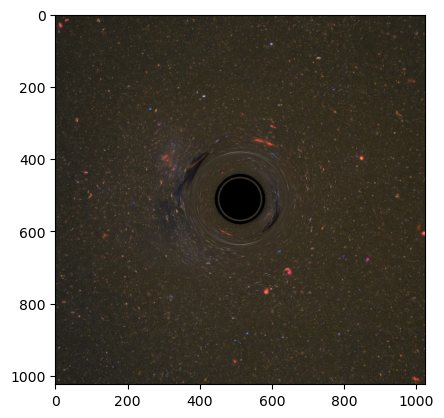

In [12]:
## now we can take a photo for the blackhole
import cv2
img = cv2.imread('./background.jpg')
w=1024
h=1024
w0=1024
h0=1024
# 135° sight
dtan=np.tan((135/2)*np.pi/180)/(h/2)
dtan0=np.tan((135/2)*np.pi/180)/(h0/2)
# distance is 10R
photo=take_photo(w,h,w0,h0,dtan,dtan0,img,R=10)
with open('photo_10R.npy','wb') as f:
    np.save(f,photo)
cv2.imwrite('./photo_10R.jpg',photo)
plt.imshow(photo/np.max(photo))


Now consider the effect of gravitational lensing on light intensity.

A factor that acts on the intensity of light is
$$\alpha=\frac{\partial b}{R\partial sin(\theta)}=\frac{\partial J}{R\partial sin(\theta)}=\frac{csc^3(\theta)}{R^3(\frac{Rcot^2(\theta)+R-1}{R^3})^{2/3}}$$

$b$ is the aiming distance.

This is my own derivation, and I cannot guarantee that it is correct. I'm a little lazy in explaining the derivation, because it requires drawing. You can deduce this for yourself and see if it works.

In [13]:
def trans_li(theta,R,n):
    J2=J_2(R,theta)
    p,x0,q=cubic_real_root(1,-1,0,1/J2)
    if p==None:
        return None
    uinf=-2*x0**0.5
    uR=-2*(-1/R+x0)**0.5
    f1=intfunc_u(np.linspace(uinf,0,2*n+1,endpoint=True),p,x0,q)
    dx1=-uinf/(2*n)
    f2=intfunc_u(np.linspace(uR,0,2*n+1,endpoint=True),p,x0,q)
    dx2=-uR/(2*n)
    delta_phi=simpson_integrate(f1,2*n+1,dx1)+simpson_integrate(f2,2*n+1,dx2)

    p1=np.sin(theta)**(-3)
    p2=R**3
    p3=R*np.tan(theta)**(-2)+R-1
    p4=p2
    factor=p1/p2/(p3/p4)**(3/2)


    return np.pi-2*delta_phi,factor

# I add a transformer. After calculation we can get a transformer which can make calculation on another background much faster.
def take_photo_li(w,h,w0,h0,dtan,dtan0,photo0,R):
    tsfmer=np.zeros((w,h,3))
    photo=np.zeros((w,h,3))
    for index in tqdm(range(w*h)):
        i=index//w
        j=index%w
        alpha=pxcoord2alpha(w,h,i,j)
        r=pxcoord2r(w,h,i,j)
        angle=rpx2angle(dtan,r)
        angle1=trans_li(angle,R,200)
        
        if angle1==None:
            photo[i,j,0]=0
            photo[i,j,1]=0
            photo[i,j,2]=0
            tsfmer[i,j,:]=-1
            continue
        else: 
            angle1,factor=angle1

            if angle1<0:
                if angle<-np.pi/2:
                    photo[i,j,0]=0
                    photo[i,j,1]=0
                    photo[i,j,2]=0
                    tsfmer[i,j,:]=-1
                    continue

                alpha=alpha+np.pi
                angle1=-angle1
        
        r1=angle2rpx(dtan0,angle1)
        k,l=ar2coord(w0,h0,alpha,r1)
        tsfmer[i,j,0]=k
        tsfmer[i,j,1]=l
        tsfmer[i,j,2]=factor
        photo[i,j,0]=factor*linear_interpolation(photo0[:,:,0], k, l)
        photo[i,j,1]=factor*linear_interpolation(photo0[:,:,1], k, l)
        photo[i,j,2]=factor*linear_interpolation(photo0[:,:,2], k, l)

    return photo,tsfmer

  0%|          | 0/1048576 [00:00<?, ?it/s]

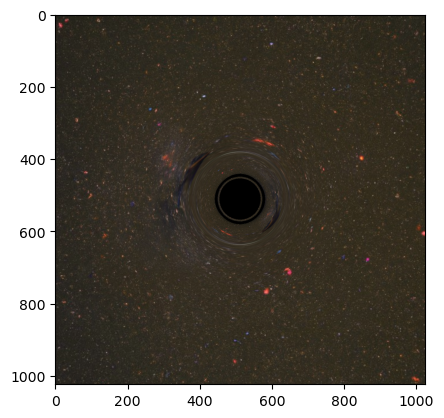

In [15]:
import cv2
img = cv2.imread('./background.jpg')
w=1024
h=1024
w0=1024
h0=1024
# 135° sight, 10R
dtan=np.tan((135/2)*np.pi/180)/(h/2)
dtan0=np.tan((135/2)*np.pi/180)/(h0/2)
photo,tsfmer=take_photo_li(w,h,w0,h0,dtan,dtan0,img,R=10)

with open('photo_10R_li.npy','wb') as f:
    np.save(f,photo)
with open('tsfmer_10R_li.npy','wb') as f:
    np.save(f,tsfmer)
cv2.imwrite('./photo_10R_li.jpg',photo)
plt.imshow(photo/np.max(photo))

In [17]:
## using tsfmer to calculate
with open('./tsfmer_10R_li.npy','rb') as f:
    tsfmer=np.load(f)
img = cv2.imread('./background.jpg')
w=1024
h=1024
w0=1024
h0=1024
photo=np.zeros((w,h,3))
for index in tqdm(range(w*h)):
    i=index//w
    j=index%w
    if tsfmer[i,j,2]==-1:
        photo[i,j,:]=0
    else:
        k=tsfmer[i,j,0]
        l=tsfmer[i,j,1]
        factor=tsfmer[i,j,2]
        photo[i,j,0]=factor*linear_interpolation(img[:,:,0], k, l)
        photo[i,j,1]=factor*linear_interpolation(img[:,:,1], k, l)
        photo[i,j,2]=factor*linear_interpolation(img[:,:,2], k, l)

cv2.imwrite('./photo_10R_li_ts.jpg',photo)

  0%|          | 0/1048576 [00:00<?, ?it/s]

True

In [18]:
# I also save the image as npy file. This code can translate it to a jpg file
with open('photo_10R_li.npy','rb') as f:
    photo=np.load(f)
cv2.imwrite('./photo_10R_li.jpg',photo)

True

  0%|          | 0/1048576 [00:00<?, ?it/s]

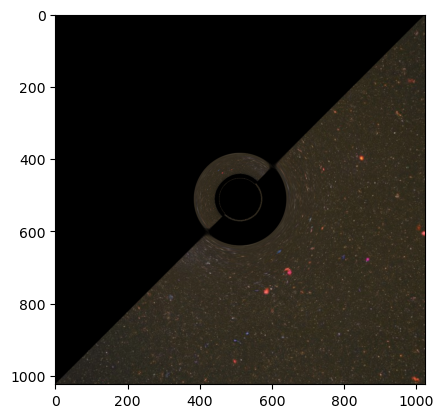

In [20]:
# This code can make a wallpaper, just for fun.
import cv2
img = cv2.imread('./background.jpg')
for i in range(1024):
    for j in range(1024):
        if i+j<1024:
            img[i,j,:]=0
w=1024
h=1024
w0=1024
h0=1024
photo=np.zeros((w,h,3))
for index in tqdm(range(w*h)):
    i=index//w
    j=index%w
    if tsfmer[i,j,2]==-1:
        photo[i,j,:]=0
    else:
        k=tsfmer[i,j,0]
        l=tsfmer[i,j,1]
        factor=tsfmer[i,j,2]
        photo[i,j,0]=factor*linear_interpolation(img[:,:,0], k, l)
        photo[i,j,1]=factor*linear_interpolation(img[:,:,1], k, l)
        photo[i,j,2]=factor*linear_interpolation(img[:,:,2], k, l)

cv2.imwrite('./wallpaper_raw.jpg',photo)
plt.imshow(photo/np.max(photo))


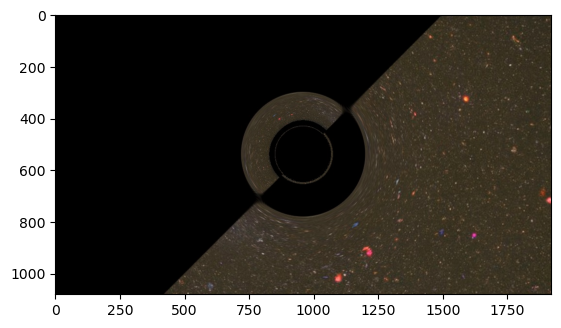

In [22]:
# This one resizes the desktop backgrond.

# (BingAI) Import the cv2 module
import cv2

# read the image
img = cv2.imread('./wallpaper_raw.jpg')

# Get the width and height of the image
w, h = img.shape[1], img.shape[0]



# Use cubic interpolation to center and scale the image
img_resized = cv2.resize(img, (int(np.round(1920*h/w)), 1920), interpolation=cv2.INTER_CUBIC)

# Calculate the number of pixels that need to be clipped at both ends of the vertical direction
crop = (1920 - 1080) // 2

# Vertically cut both ends equidistant to 1920*1080
img_cropped = img_resized[crop:crop+1080, :]

cv2.imwrite('./wallpaper.jpg',img_cropped)
plt.imshow(img_cropped/np.max(img_cropped))